In [1]:
import random
import itertools

import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import seaborn as sns

In [2]:
random.seed(1789)
N=10000

In [3]:
x = range(N)
series = [random.randrange(-1,2) for i in range(N)]

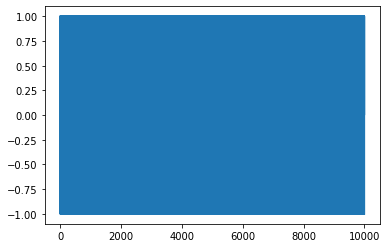

In [4]:
sns.lineplot(x=x, y=series);

In [5]:
# very inefficient creation of a random walk, don't use for N>100000
# %timeit walk = [sum(series[:i+1]) for i in range(N)]

In [6]:
# much faster, see https://stackoverflow.com/questions/15889131/how-to-find-the-cumulative-sum-of-numbers-in-a-list
# %timeit walk = list(itertools.accumulate(series))

In [7]:
walk = list(itertools.accumulate(series))

<AxesSubplot:>

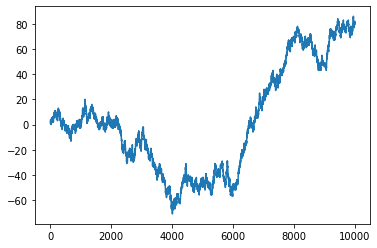

In [8]:
sns.lineplot(x=x, y=walk)

In [9]:
walk_of_walk = list(itertools.accumulate(walk))

<AxesSubplot:>

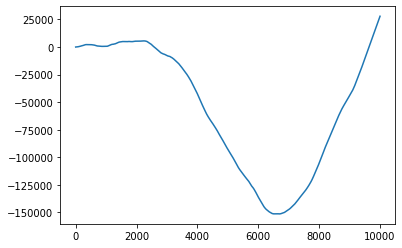

In [10]:
sns.lineplot(x=x, y=walk_of_walk)

In [11]:
walk_of_walk_of_walk = list(itertools.accumulate(walk_of_walk))

<AxesSubplot:>

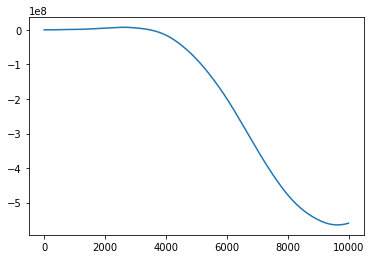

In [12]:
sns.lineplot(x=x, y=walk_of_walk_of_walk)

In [58]:
stats.zscore(walk).mean(), stats.zscore(walk).std()

(-4.5474735088646414e-17, 0.9999999999999999)

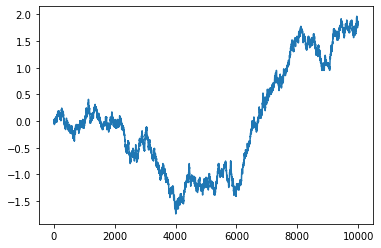

In [59]:
sns.lineplot(x=x, y=stats.zscore(walk));

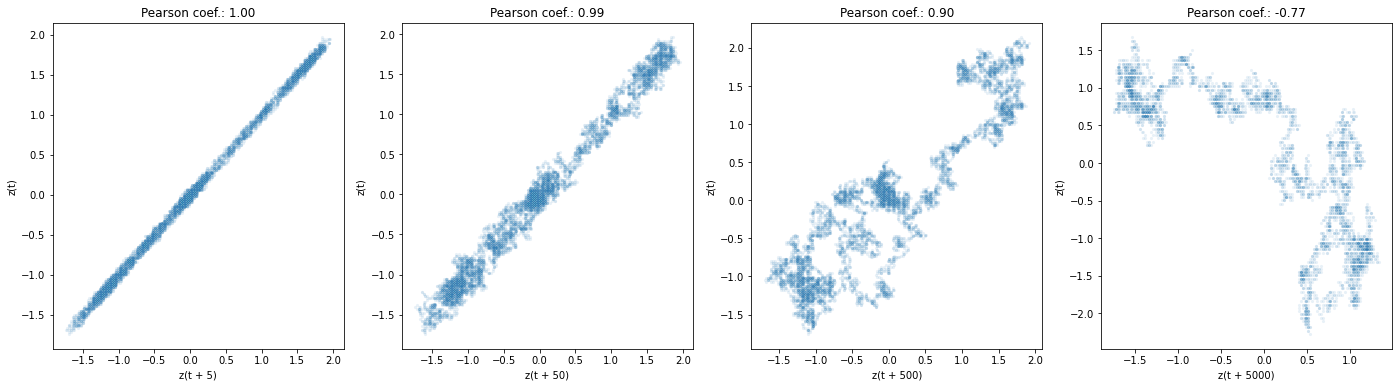

In [77]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

for shift, axis in [(5,ax1),(50,ax2),(500,ax3),(5000,ax4)]:
    
    X = stats.zscore(walk[:-shift])
    Y = stats.zscore(walk[shift:])
    
    R = stats.pearsonr(X,Y)[0]
    
    axis.set_title(f"Pearson coef.: {R:.2f}")
    axis.set_xlabel(f"z(t + {shift})")
    axis.set_ylabel(f"z(t)")
    
    sns.scatterplot(x=Y,y=X, s=10, ax=axis, alpha=0.1, );

In [106]:
import darts
from darts.utils.statistics import plot_acf, plot_pacf, check_seasonality

In [79]:
ds_walk = pd.Series(walk)
ts_walk = darts.TimeSeries.from_series(ds_walk)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


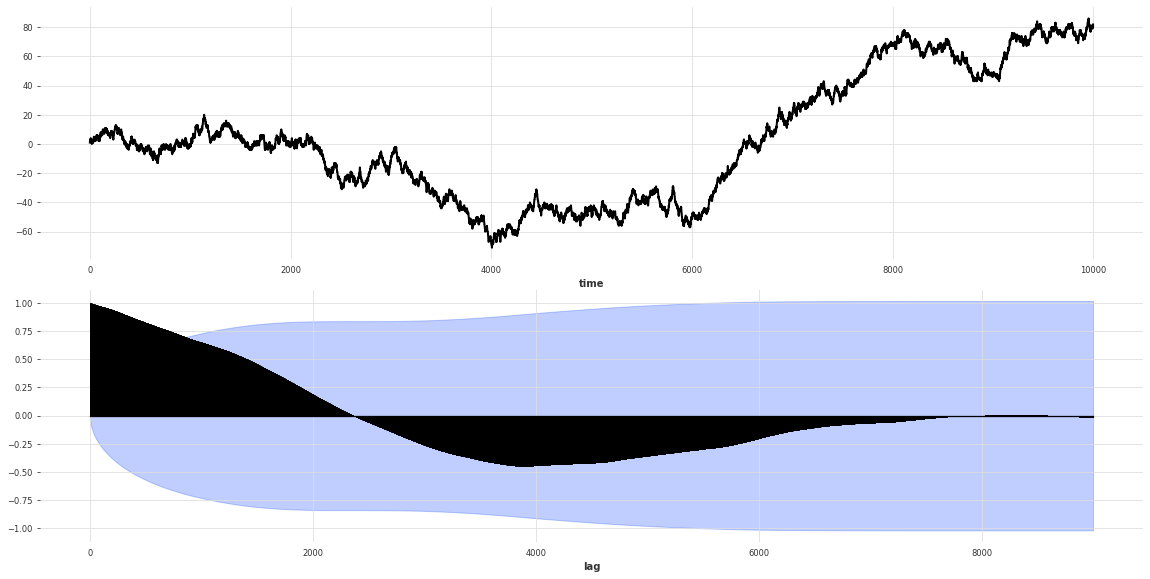

In [92]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))
fig.tight_layout()
ts_walk.plot(ax=ax1)
ax1.set_title("")
ax2.set_xlabel("lag")
plot_acf(ts_walk, max_lag=9000, axis=ax2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


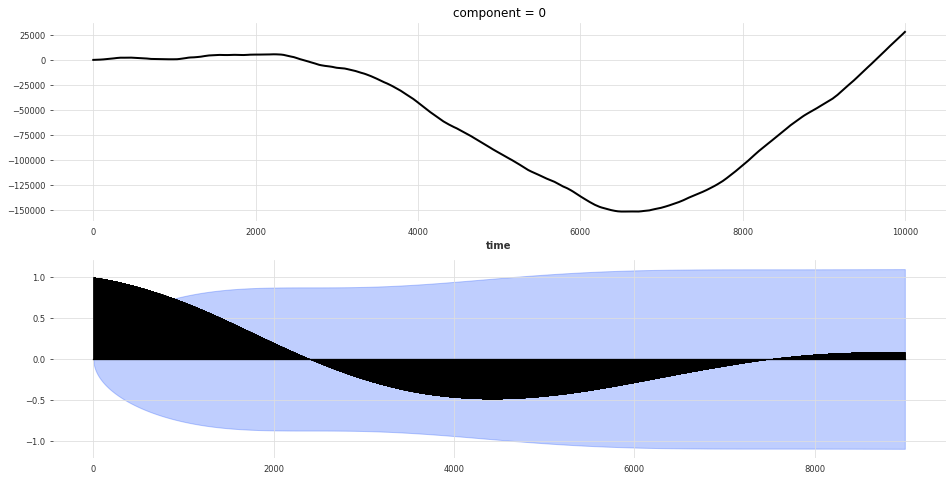

In [81]:
ds_walk_walk = pd.Series(walk_of_walk)
ts_walk_walk =darts.TimeSeries.from_series(ds_walk_walk)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))
ts_walk_walk.plot(ax=ax1)
plot_acf(ts_walk_walk, max_lag=9000, axis=ax2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


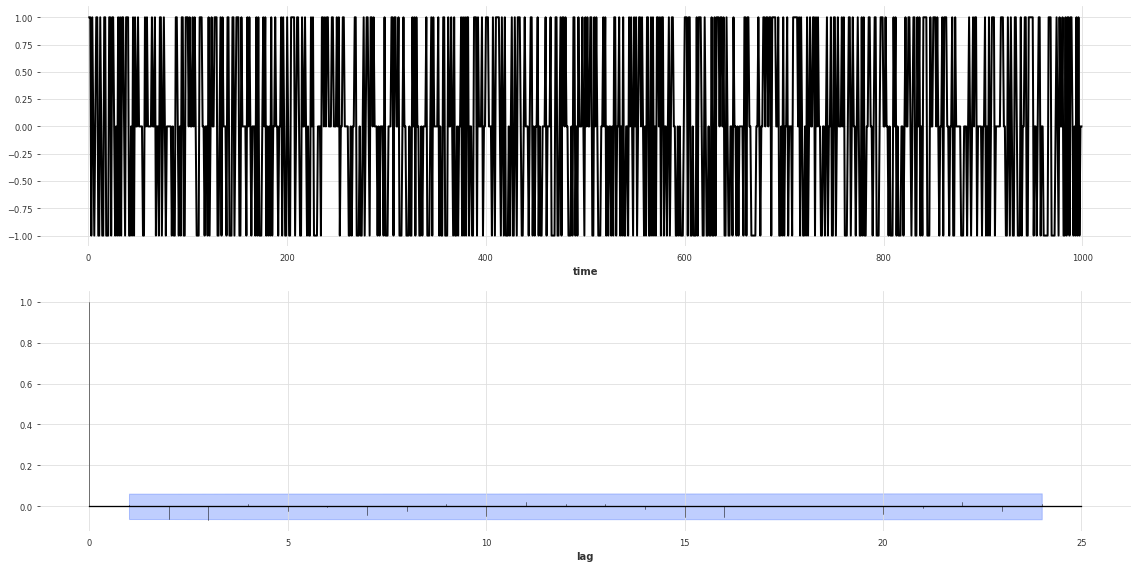

In [105]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))

walk_diff = ts_walk[:1000].diff()
walk_diff.plot(ax=ax1)
ax1.set_title("")
ax2.set_xlabel("lag")
fig.tight_layout()
plot_acf(walk_diff, axis=ax2)

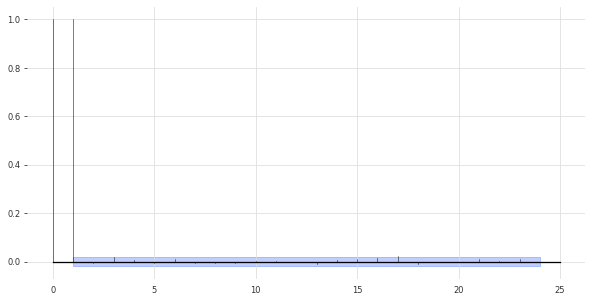

In [112]:
plot_pacf(ts_walk)